# Using tkinter

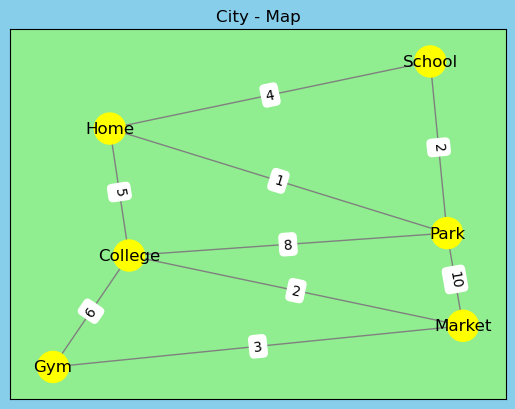

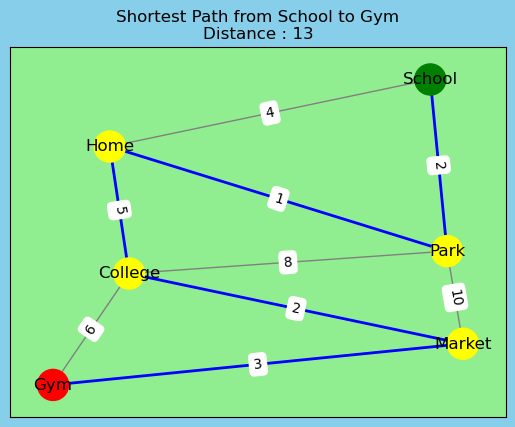

In [29]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq
from tkinter import *

def create_graph():
    G = nx.Graph()
    edges = [
        ('School', 'Home', 4), ('School', 'Park', 2),
        ('Home', 'Park', 1), ('Home', 'College', 5),
        ('Park', 'College', 8), ('Park', 'Market', 10),
        ('College', 'Market', 2), ('College', 'Gym', 6),
        ('Market', 'Gym', 3)
    ]
    G.add_weighted_edges_from(edges)
    return G

def dijkstra(G, start, end):
    distances = {node: float('infinity') for node in G.nodes()}
    distances[start] = 0
    previous = {node: None for node in G.nodes()}
    pq = [(0, start)]
    visited = set()
    
    while pq:
        current_distance, current = heapq.heappop(pq)
        if current in visited:
            continue
            
        visited.add(current)
        if current == end:
            break
            
        for neighbor in G.neighbors(current):
            if neighbor in visited:
                continue
            weight = G[current][neighbor]['weight']
            distance = distances[current] + weight
            
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous[neighbor] = current
                heapq.heappush(pq, (distance, neighbor))
    
    path = []
    current = end
    while current is not None:
        path.append(current)
        current = previous[current]
    path.reverse()
    
    return path, distances[end]

def visualize_graph(G, start="", end=""):
    
    pos = nx.spring_layout(G)
    
    plt.title("City - Map")
    plt.gcf().set_facecolor('skyblue')
    plt.gca().set_facecolor('lightgreen')
    
    nx.draw_networkx_nodes(G, pos, node_color=['green' if node == start 
                                    else 'red' if node == end 
                                    else 'yellow' for node in G.nodes()],
                          node_size=500)
    
    nx.draw_networkx_edges(G, pos, edge_color='gray')
    
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels)
    nx.draw_networkx_labels(G, pos)
    plt.show()
    root=Tk()
    root.title("Easy Navigation")
    root.geometry('400x400')
    root.config(bg='skyblue')
    s=StringVar()
    e=StringVar()
    source=Label(root,text="Enter Source").pack()
    entry1=Entry(root,textvariable=s).pack()
    destination=Label(root,text="Enter Destination").pack()
    entry2=Entry(root,textvariable=e).pack()
    
    def shortest():
        start=s.get()
        end=e.get()
    
        path, distance = dijkstra(G, start, end)
        path_edges = list(zip(path[:-1], path[1:]))
    
        nx.draw_networkx_nodes(G, pos, 
                              node_color=['green' if node == start 
                                        else 'red' if node == end 
                                        else 'yellow' for node in G.nodes()],
                              node_size=500)
    
        nx.draw_networkx_edges(G, pos, 
                              edge_color='gray')
    
        nx.draw_networkx_edges(G, pos,
                              edgelist=path_edges,
                              edge_color='blue',
                              width=2)
    
        nx.draw_networkx_edge_labels(G, pos, edge_labels)
        nx.draw_networkx_labels(G, pos)
    
        plt.title(f"Shortest Path from {start} to {end}\nDistance : {distance}")
        plt.gcf().set_facecolor('skyblue')
        plt.gca().set_facecolor('lightgreen')
        plt.show()
    button=Button(root,text="Navigate",command=shortest).pack()
    root.mainloop()
G = create_graph()
visualize_graph(G)